# Part I - Loan Data Exploration

## by Rachel Olujuyigbe

## Introduction
> This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.






## Preliminary Wrangling

In [67]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 100)

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [68]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

In [70]:
# high-level overview of data shape and composition
print(df.shape)
print(df.head(6))

(113937, 81)
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                

In [71]:
# see number of null values on each columns
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [72]:
# see number of duplicated data entries
sum(df.duplicated()) 

0

In [73]:
# Subset the dataframe by selecting features of interest
#cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
 #       'EmploymentStatus', 'Occupation','LoanStatus','ListingCategory (numeric)','MonthlyLoanPayment','BorrowerAPR']
#loan_sub = df[cols]

In [74]:
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [75]:
# descriptive statistics for numeric variables
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
count             84853.000000  84853.000000              113937.000000   
mean                  4.072243      5.950067                   2.774209   
std                   1.673227      2.376501                   3.996797   
min                   1.000000      1.000000                   0.000000   
25%                   3.000000      4.000000                   1.000000   
50%                   4.000000      6.000000                   1.000000   
75%                   5.000000      8.000000                   3.000000   
max                   7.000000     11.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             106312.000000          113346.000000          113346.000000   
mean                  96.071582             685.567731             704.567731   
std                   94.480605              66.458275              66.458275   
min                    0.000000               0.000000              19.000000   
25%                   26.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  137.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       106333.000000    106333.000000               113240.000000   
mean            10.317192         9.260164                   26.754539   
std              5.457866         5.022644                   13.637871   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count           113937.00000                113937.000000   
mean                 6.96979                   398.292161   
std                  4.63097                   447.159711   
min                  0.00000                     0.000000   
25%                  4.00000                   114.000000   
50%                  6.00000                   271.000000   
75%                  9.00000                   525.000000   
max                 51.00000                 14985.000000   

       InquiriesLast6Months  Tot

In [76]:
df.index.is_unique

True

In [77]:
df.index.duplicated()

array([False, False, False, ..., False, False, False], dtype=bool)

In [78]:
df= df.loc[~df.index.duplicated(), :]

In [79]:
df.loc[~df.index.duplicated(), :]

ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5       0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6       0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7       0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
10      0F123545674891886D9F106         587746  2012-05-10 07:04:01.577000000   
11      0F1734025150298088A5F2B         213551  2007-10-09 20:28:33.640000000   
12      0F1A3597143888805163EF7        1081604  2013-12-15 20:01:10.757000000   
13      0F1C3583260311305D68F87         840820  2013-07-15 16:28:28.087000000   
14      0F353575943675863D1AFC0         757359  2013-04-19 11:17:41.700000000   
15      0F483544120452347F48121         577164  2012-04-10 09:14:46.297000000   
16      0F4835843081468212F0892         841846  2013-07-16 12:42:48.680000000   
17      0FDF336575182398852A8DC          31540  2006-08-15 12:21:09.433000000   
18      0FF2357105361877390B58D         716058  2013-02-20 03:48:37.470000000   
19      0FFC35866018516621B0D3F         875565  2013-08-21 06:49:02.093000000   
20      101635959323992333B3C70        1011916  2013-11-22 11:35:02.987000000   
21      1017340630713945364DA6B         241498  2007-11-30 20:33:49.227000000   
22      101735700321773921526BF         706927  2013-01-30 09:36:13.783000000   
23      101B35764008108187B2EBA         758964  2013-04-22 13:29:19.073000000   
24      101B3596709094692AC79C0        1046345  2013-12-03 11:34:46.127000000   
25      10223590888942486E3826E         950067  2013-10-02 14:31:09.157000000   
26      0F4F3571508214190FD75CB         713131  2013-02-12 18:07:31.690000000   
27      0F5034867864161084F3789         463083  2010-06-16 16:23:44.533000000   
28      0F53359346357513247D86B         989519  2013-11-02 16:01:28.050000000   
29      0F563597161095613517437        1051243  2013-12-17 09:18:33.220000000   
...                         ...            ...                            ...   
113907  C982359388882926442DE72        1005215  2013-11-09 06:55:05.690000000   
113908  C9843500054876019D611A1         486057  2010-11-29 10:40:09.730000000   
113909  C98635564651525938EB38E         635880  2012-09-08 10:34:38.837000000   
113910  C9873600264828351437CAB        1161059  2014-01-24 19:56:49.960000000   
113911  C9883594035073098BC5D51         996496  2013-11-15 11:42:47.540000000   
113912  C98A3597264633447D66DF9        1083677  2013-12-16 16:36:00.990000000   
113913  D2013482695428940FAD9E3         455673  2010-04-25 15:13:27.963000000   
113914  D20533652658825353F6597          30223  2006-08-09 14:34:40.010000000   
113915  D2053427325575423785798         374730  2008-07-29 05:22:29.390000000   
113916  D2063562664602024E13D82         667047  2012-11-08 20:07:36.600000000   
113917  D2063594229009539839457        1028126  2013-11-23 04:52:50.057000000   
113918  D207342464194217591D1E1         353488  2008-06-19 12:02:53.300000000   
113919  D20C3577637248543A1F80C         772509  2013-05-07 18:49:59.750000000   
113920  D20E358076984586576526D         804763  2013-06-11 05:49:40.247000000   
113921  D21A33647075665665BE266              4  2005-11-09 20:44:28.847000000   
113922  D2293427338962159DA5143         379986  2008-08-08 16:58:54.760000000   
113923  E334343080922352965DF86         395877  2008-09-10 08:26:30.537000000   
113924  E340356181565702714DBCE         657862  2012

In [80]:
# Remove loans with missing borrower APR information
df = df[~df.BorrowerAPR.isna()]

### What is the structure of your dataset?

> The dataset contains 113,937 loans with 81 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others)

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figureing out what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the total loan amount will have a negative effect on the APR of the loan: the larger the total loan amount, the lower the APR. I also think that the borrowers stated monthly income, loan term, Prosper rating, employment status will also have effects on the APR.

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: borrower APR.


>Here we will start to see the distribution of each variable and we will start by creating functions to not repete the code.

In [81]:
#Function to plot a horizontal bar
def plot_horizontal_bar(dataframe,column_name):
    color=sb.color_palette()[0]
    column_name_count=dataframe[column_name].value_counts()
    plot=sb.countplot(data=dataframe,y=column_name,color=color,order=column_name_count.index)
    return(plot)

In [82]:
#function to plot the virtical bar
def plot_vertical_bar(dataframe,column_name):
    color=sb.color_palette()[0]
    column_name_count=dataframe[column_name].value_counts()
    plot=sb.countplot(data=dataframe,x=column_name,color=color,order=column_name_count.index);
    return(plot)

In [83]:
def plot_hist(dataframe,column_name,bin_stip):
    bins=np.arange(dataframe[column_name].min(),dataframe[column_name].max()+bin_stip,bin_stip)
    plot=plt.hist(data=dataframe,x=column_name,bins=bins);
    return(plot)

>Starting with the columns related to the Borrower

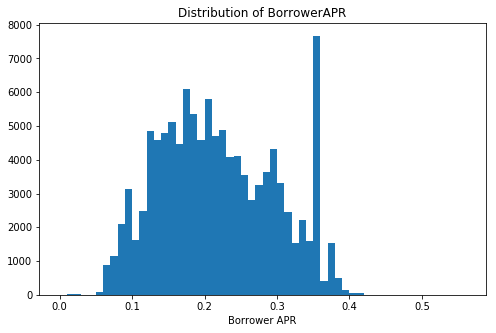

In [84]:
bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.title('Distribution of BorrowerAPR')
plt.xlabel('Borrower APR');

> The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. 
> There is also a small peak centered 0.3. 
> Additionally, there is a very shape peak between 0.35 and 0.36. 
> Only very few loans have APR greater than 0.43.

In [58]:
# Check loans with APR greater than 0.43
df[df.BorrowerAPR>0.43]

ListingKey  ListingNumber            ListingCreationDate  \
18326   0161336483146123835D6A5           1795  2006-03-11 15:43:45.393000000   
22195   5686336572505607862C0C7           1849  2006-03-12 13:44:15.060000000   
36018   844033650124564886B3EDC            690  2006-02-23 13:57:02.087000000   
56761   A79D33661366830833F3EF5           2231  2006-03-16 19:30:16.753000000   
82043   BBED336465905564254DC8B           1112  2006-03-02 19:00:17.593000000   
103973  95ED3365915044756AB754F           1366  2006-03-06 22:36:53.753000000   

       CreditGrade Term  LoanStatus           ClosedDate  BorrowerAPR  \
18326           HR   36   Defaulted  2007-01-14 00:00:00      0.45857   
22195           HR   36  Chargedoff  2009-02-15 00:00:00      0.46201   
36018           HR   36   Completed  2006-03-14 00:00:00      0.51229   
56761           HR   36   Defaulted  2006-09-19 00:00:00      0.50633   
82043           HR   36   Defaulted  2006-09-05 00:00:00      0.48873   
103973          HR   36   Defaulted  2006-10-08 00:00:00      0.45857   

        BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
18326         0.4500       0.4325                      NaN            NaN   
22195         0.4500       0.4325                      NaN            NaN   
36018         0.4975       0.4925                      NaN            NaN   
56761         0.4975       0.4800                      NaN            NaN   
82043         0.4800       0.4750                      NaN            NaN   
103973        0.4500       0.4325                      NaN            NaN   

        EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
18326               NaN                      NaN                   NaN   
22195               NaN                      NaN                   NaN   
36018               NaN                      NaN                   NaN   
56761               NaN                      NaN                   NaN   
82043               NaN                      NaN                   NaN   
103973              NaN                      NaN                   NaN   

        ProsperScore  ListingCategory (numeric) BorrowerState Occupation  \
18326            NaN                          0           NaN        NaN   
22195            NaN                          0           NaN        NaN   
36018            NaN                          0           NaN        NaN   
56761            NaN                          0           NaN        NaN   
82043            NaN                          0           NaN        NaN   
103973           NaN                          0           NaN        NaN   

       EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
18326               NaN                       NaN                False   
22195               NaN                       NaN                False   
36018               NaN                       NaN                False   
56761               NaN                       NaN                False   
82043               NaN                       NaN                False   
103973              NaN                       NaN                False   

        CurrentlyInGroup                 GroupKey  \
18326              False  F555336594467179889CEFB   
22195              False  F555336594467179889CEFB   
36018              False                      NaN   
56761              False  F555336594467179889CEFB   
82043              False                      NaN   
103973             False  F555336594467179889CEFB   

                     DateCreditPulled  CreditScoreRangeLower  \
18326   2006-02-20 16:42:34.790000000                    NaN   
22195   2006-03-12 11:53:40.663000000                    NaN   
36018   2006-02-23 13:57:02.087000000                    NaN   
56761   2006-03-16 18:39:30.963000000                    NaN   
82043   2006-03-02 11:32:57.040000000                    NaN   
103973  2006-03-04 21:47:58.270000000                    NaN   

        C



>The 6 borrowers with largest APR have small loan amount and don't have records of Prosper rating and employment status.

> Next up, look at the distribution of the first predictor variable of interest: LoanOriginalAmount

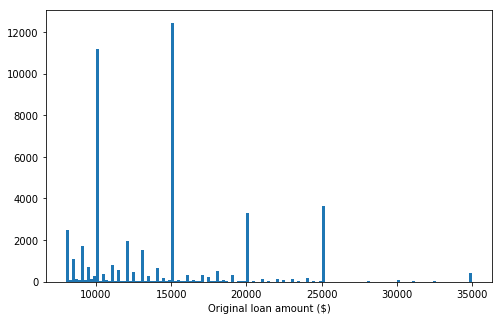

In [85]:
bins = np.arange(8000, df.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

>The very large spikes in frequency are at 10k, 15k, 20k, 25k and 35k. There are also small spikes at 8k,9k,11k,12k,13k,14k etc. It means that most of the loans are multiples of 1k.

>Let's look at the distributions of other variables of interest: **stated monthly income**

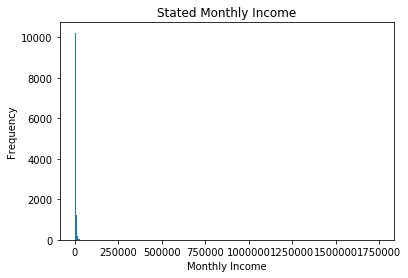

In [86]:
# Distribution of stated monthly income
bins_mi = np.arange(0,df["StatedMonthlyIncome"].max()+500,500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bins_mi);

#labels and title
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.title("Stated Monthly Income");

> We can't see anything so we will try to make a limit for the x axis

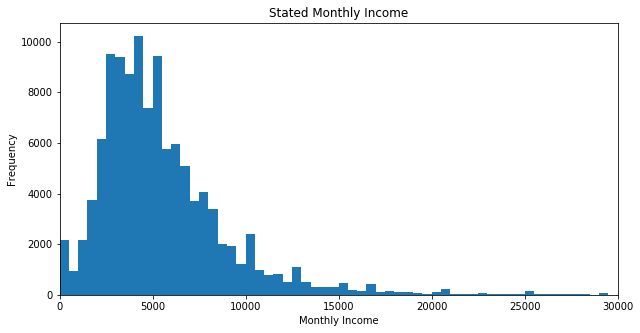

In [87]:
plt.figure(figsize=[10,5])
# making limit in x axis 
bins_mi=np.arange(0,df["StatedMonthlyIncome"].max()+500,500)
plt.hist(data=df,x="StatedMonthlyIncome",bins=bins_mi);
plt.xlim(0,30000);

#labels and title
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.title("Stated Monthly Income");

> The graph is right skewed and we can note a beak around 3K and 5K.
> Let's try to implement the log scale

In [88]:
np.log10(df["StatedMonthlyIncome"].describe())

count    5.056569
mean     3.748728
std      3.873805
min          -inf
25%      3.505150
50%      3.669007
75%      3.833599
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

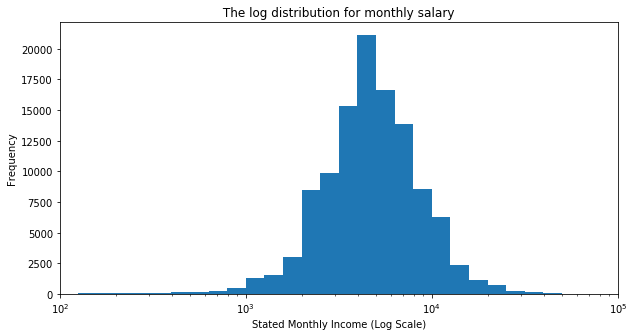

In [89]:
plt.figure(figsize=[10,5])
#implementing the log scale
bins_mi=10**np.arange(0,6.2+1,0.1)
plt.hist(data=df,x="StatedMonthlyIncome",bins=bins_mi)
plt.xscale("log")
# making limit for the x axis to get better insights
plt.xlim(1e2,1e5)

# lables and title for the graph
plt.xlabel("Stated Monthly Income (Log Scale)")
plt.ylabel("Frequency")
plt.title(" The log distribution for monthly salary ");

> The log distribution is normaly distributed and we have a beak between 3K and 5K with most of the stated monthly income less than 30k

> **What is the occupation status of Borrowers**

In [90]:
# making new dataframe to contian the most frequently occupations to avoid crawding
Occupation_frequency=df["Occupation"].value_counts()
ind=np.sum(Occupation_frequency>500) #will select the possitions repeated more than 500 times
print(ind)
most_Occupation=Occupation_frequency.index[:ind]
new_df=df[df["Occupation"].isin(most_Occupation)]

31


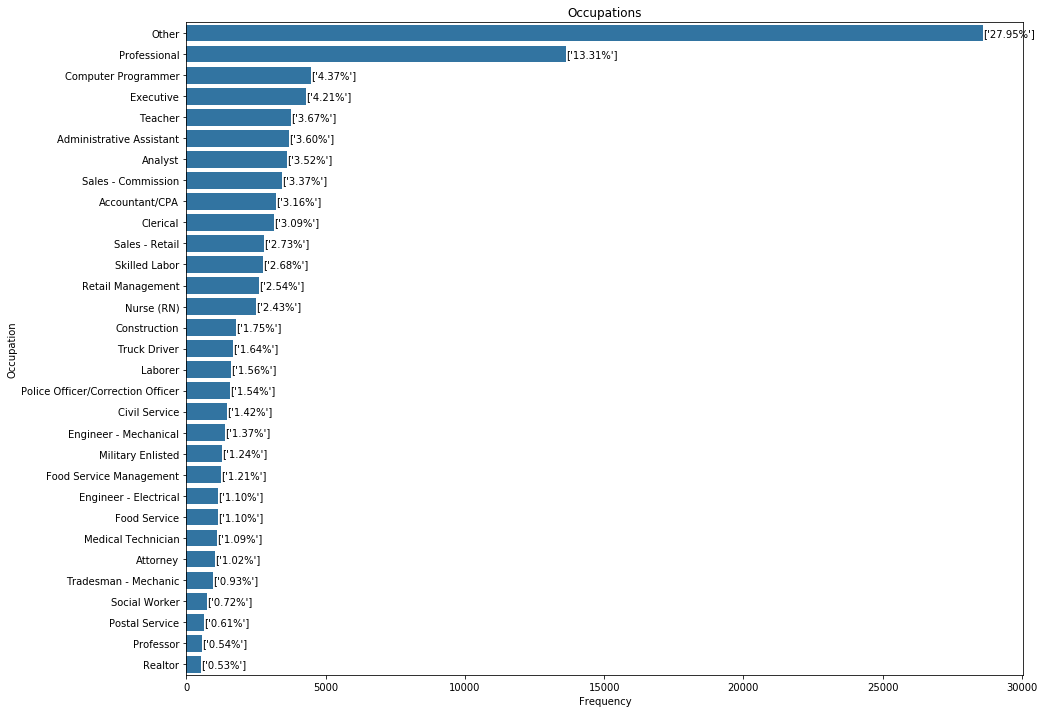

In [91]:
#ploting the bar chart
plt.figure(figsize=[15,12])
plot_horizontal_bar(new_df,"Occupation")

#labels and title
plt.xlabel("Frequency")
plt.ylabel("Occupation")
plt.title("Occupations");

#add % at the end of each bar
occupation_count=new_df["Occupation"].value_counts()
for i in range(occupation_count.shape[0]):
    count=occupation_count[i]
    pct_string=["{:0.2f}%".format(100*count/new_df.shape[0])]
    plt.text(count+1,i,pct_string,va="center")

> The most known position taking a loan is computer programmer

> Let's see the length of loan terms

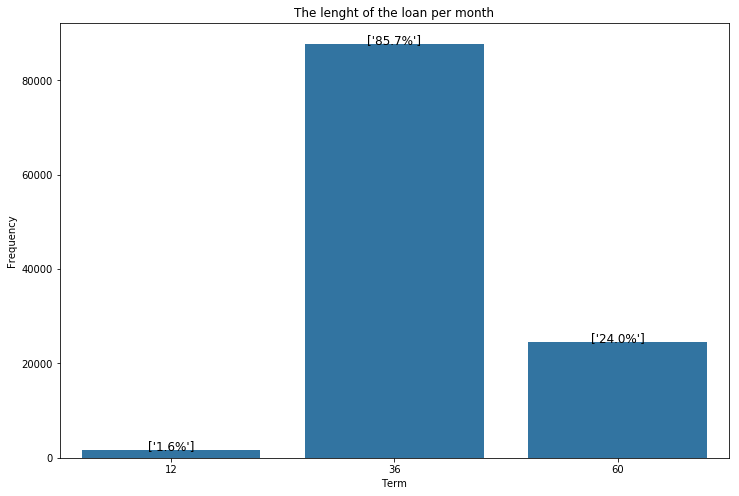

In [92]:
plt.figure(figsize=[12,8])
df["Term"]=df["Term"].astype(str)
order=["12","36","60"]
color=sb.color_palette()[0]
sb.countplot(data=df,x="Term",order=order,color=color)

#labels and title
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.title("The lenght of the loan per month");

term_count=df["Term"].value_counts()
locs,labels=plt.xticks()
for loc,label in zip(locs,labels):
    count=term_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/new_df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=12)

>We can see that about 77% of borrowers take a 36 months loan term

>Let's see what is the frequency of loan status

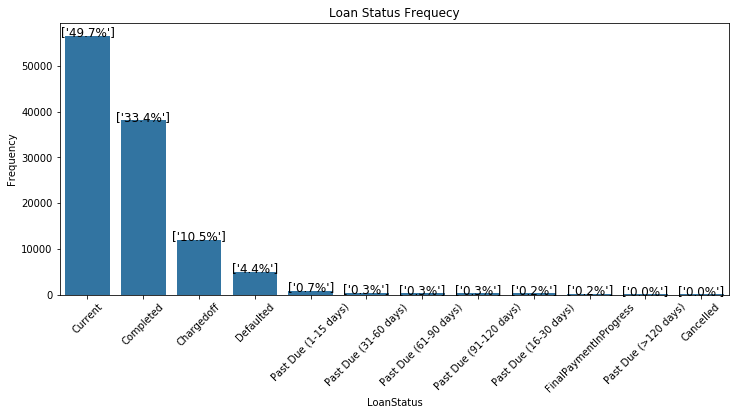

In [93]:
plt.figure(figsize=[12,5])
plot_vertical_bar(df,"LoanStatus");

#labels and title
plt.xlabel("LoanStatus")
plt.ylabel("Frequency")
plt.title("Loan Status Frequecy");

term_count=df["LoanStatus"].value_counts()
locs,labels=plt.xticks(rotation = 45)
for loc,label in zip(locs,labels):
    count=term_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=12)

> Most loans are current loans which implies that 50% of the loans are still running

> Let's see the Employment Status of Borrowers

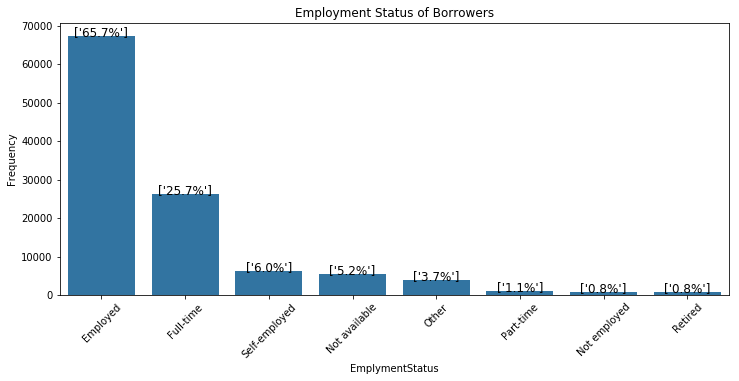

In [94]:
plt.figure(figsize=[12,5])
plot_vertical_bar(df,"EmploymentStatus");

#labels and title
plt.xlabel("EmplymentStatus")
plt.ylabel("Frequency")
plt.title("Employment Status of Borrowers");

term_count=df["EmploymentStatus"].value_counts()
locs,labels=plt.xticks(rotation = 45)
for loc,label in zip(locs,labels):
    count=term_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/new_df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=12)

> I will assume that full-time and part-time can be considered as Employed as well

In [95]:
#replacing the word Full-Time and Part-Time by Employed
df['EmploymentStatus'] = df['EmploymentStatus'].replace(['Full-time', 'Part-time'],'Employed')

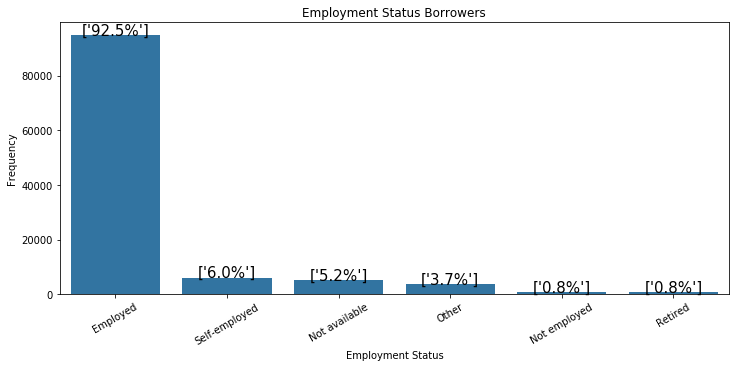

In [98]:
plt.figure(figsize=[12,5])
plot_vertical_bar(df,"EmploymentStatus");
plt.xticks(rotation=30);
plt.xlabel("Employment Status")
plt.ylabel("Frequency")
plt.title("Employment Status Borrowers")

# ploting the percentage above each column
column_count=df["EmploymentStatus"].value_counts()
locs,labels=plt.xticks(rotation = 30)
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string=["{:0.1f}%".format(100*count/new_df.shape[0])]
    plt.text(loc,count+2,pct_string,ha="center",fontsize=15)

> From this module we can see that 92% of borrowers are employed.

> Let's see what the purpose of the loans

>First we will make a list that contains keys in which column and the describtion of the number and then maping the value using .map()

In [99]:
# making the list
listing_cat={0:"Not Available",1:"Debt Consolidation",2:"Home Improvement", 3 :"Business", 4:"Personal Loan",
             5: "Student Use", 6:"Auto", 7:"Other", 8:"Baby&Adoption",
             9 :"Boat", 10:"Cosmetic Procedure", 11:"Engagement Ring", 12:"Green Loans",
             13:"Household Expenses", 14:"Large Purchases", 15:"Medical/Dental",
             16:"Motorcycle", 17:"RV", 18:"Taxes", 19:"Vacation", 20:"Wedding Loans"}

In [100]:
# remaping the keys with values from the dic
df["ListingCategory (numeric)"]=df["ListingCategory (numeric)"].map(listing_cat) 

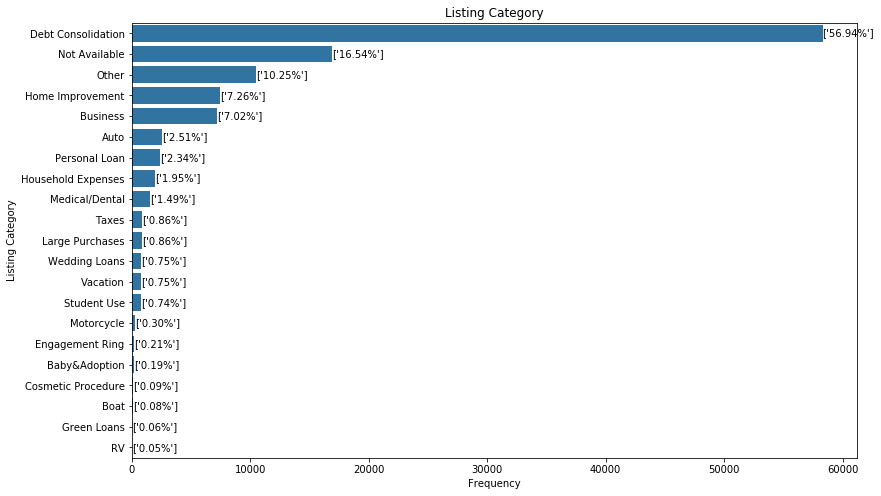

In [101]:
#ploting the bar chart
plt.figure(figsize=[13,8])
plot_horizontal_bar(df,"ListingCategory (numeric)")

#labels and title
plt.xlabel("Frequency")
plt.ylabel("Listing Category")
plt.title("Listing Category");

#add % at the end of each bar
column_count=df["ListingCategory (numeric)"].value_counts()
for i in range(column_count.shape[0]):
    count=column_count[i]
    pct_string=["{:0.2f}%".format(100*count/new_df.shape[0])]
    plt.text(count+1,i,pct_string,va="center")
  

> Around 57% going to Debt Consolidation, 7.26% for home improvement and 7.02% for business purpose

>Let's see the amount of loan borrowers are most interested in taking

In [102]:
df["LoanOriginalAmount"].describe()

count    113912.000000
mean       8338.015661
std        6245.940592
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

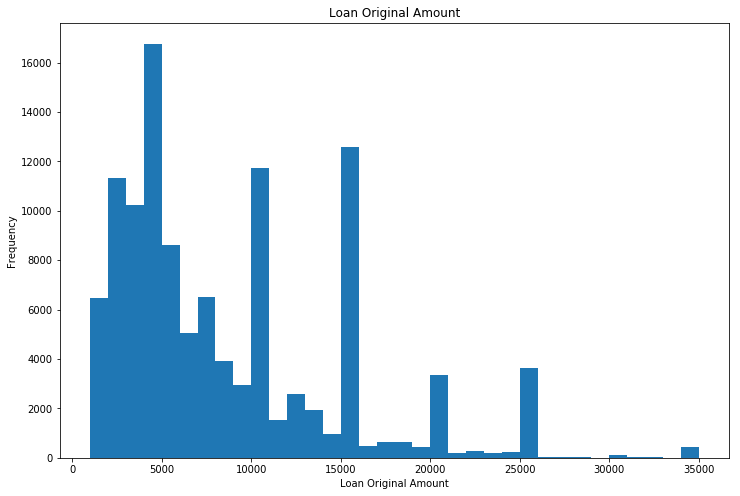

In [103]:
plt.figure(figsize=[12,8])
plot_hist(df,"LoanOriginalAmount",1000);

#labels and title
plt.xlabel("Loan Original Amount")
plt.ylabel("Frequency")
plt.title("Loan Original Amount");

>Most people are interested in taking loans of 5k, 10k and 15k

>Let's see the amount people pay for loans monthly

In [104]:
df["MonthlyLoanPayment"].describe()

count    113912.000000
mean        272.511490
std         192.697031
min           0.000000
25%         131.685000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

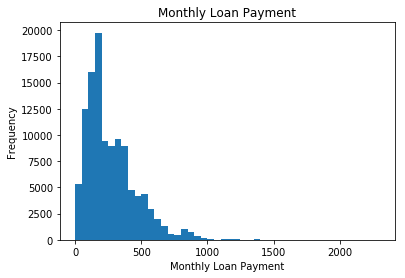

In [105]:
plot_hist(df,"MonthlyLoanPayment",50);

#labels and title
plt.xlabel("Monthly Loan Payment")
plt.ylabel("Frequency")
plt.title("Monthly Loan Payment");

>This graph is right skewed and we have beak around $210

>Let's see the frequency of the borrower rate

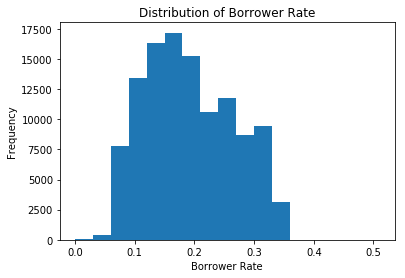

In [106]:
plot_hist(df,"BorrowerRate",0.03);

#labels and title
plt.xlabel("Borrower Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Borrower Rate");

>The distribution is normal and the peak is between 0.1 nad 0.2

>**Let's see the distribution of lender yield**

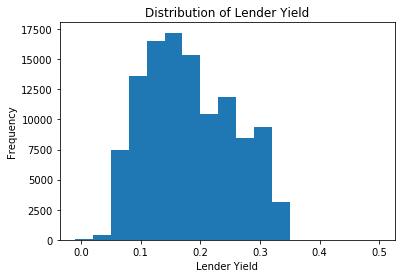

In [107]:
plot_hist(df,"LenderYield",0.03);

#labels and title
plt.xlabel("Lender Yield")
plt.ylabel("Frequency")
plt.title("Distribution of Lender Yield");

>The distribution is normal and the peak is between 0.1 nad 0.2

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.4. There are no unusual points and no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions of stated monthly income is highly right screwed. Most stated monthly incomes are less than 30k, but some of them are incredibly high, like greater than 100k. Surprisingly, most of borrowers with greater than 100k monthly income only loan less than 5k dollars. So, the very large stated monthly income may be made up. Overall, Less than 0.3 percent borrowers have stated monthly income greater than 30k.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [108]:
quant_vars=["StatedMonthlyIncome","LoanOriginalAmount","MonthlyLoanPayment","BorrowerAPR","BorrowerRate","LenderYield","OpenCreditLines","ProsperScore"]

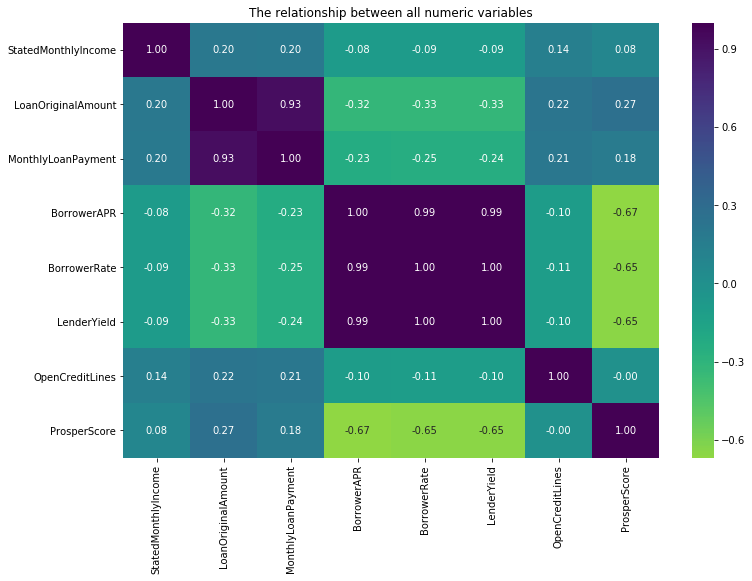

In [109]:
#ploting the correlation heat map between the quantitative selected variables
plt.figure(figsize=[12,8])
sb.heatmap(df[quant_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'viridis_r', center = 0)
#title
plt.title("The relationship between all numeric variables");

> 1.The Loan original amount has a strong positive relationship with the monthly loan payment <br>
> 2.The borrower APR has a strong positive relationship with the lenderyield <br>
> 3.The prosper score has a negative relationship with borrower APR and lenderyeild<br>
> 4.The Loan original amount has a negative relationship with borrower Rate and lenderyeild but not strongly

>**The relation between Loan Original Amount and Monthly Loan Payment**

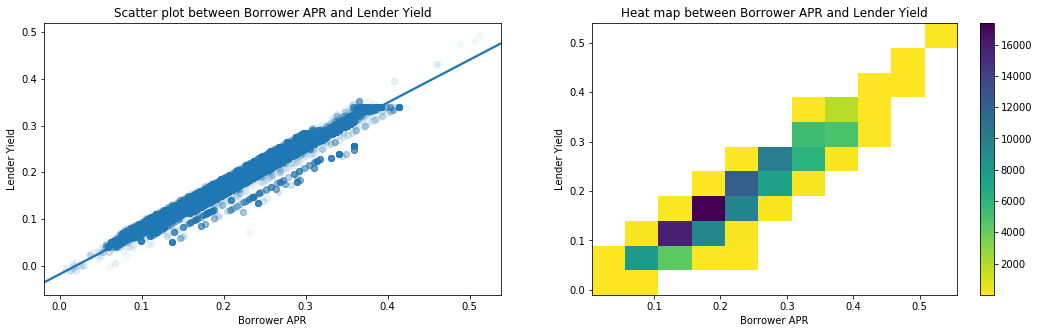

In [110]:
plt.figure(figsize = [18, 5])

plt.subplot(1, 2, 1)
sb.regplot(data=df,x="BorrowerAPR",y="LenderYield",scatter_kws={"alpha":1/20});
plt.xlabel("Borrower APR");
plt.ylabel("Lender Yield");
plt.title("Scatter plot between Borrower APR and Lender Yield");

plt.subplot(1, 2, 2)
x_bin = np.arange(df['BorrowerAPR'].min(), df['BorrowerAPR'].max()+0.05,0.05)
y_bin = np.arange(df['LenderYield'].min(), df['LenderYield'].max()+0.05,0.05)
plt.hist2d(data = df, x = 'BorrowerAPR', y = 'LenderYield', bins = [x_bin, y_bin], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xlabel("Borrower APR");
plt.ylabel("Lender Yield");
plt.title("Heat map between Borrower APR and Lender Yield");

> The relation between Borrower APR and Lender yield is strongly positive in both heat map and scatter plot

>**The relation between Loan Original Amount and Borrower Rate**

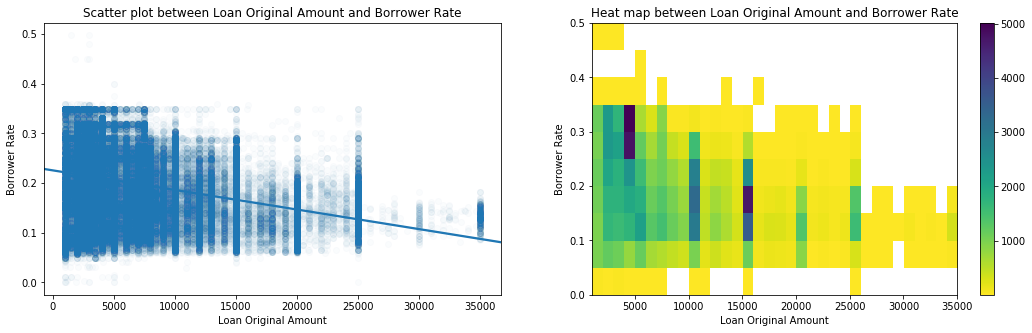

In [111]:
plt.figure(figsize = [18, 5])

plt.subplot(1, 2, 1)
sb.regplot(data=df,x="LoanOriginalAmount",y="BorrowerRate",scatter_kws={"alpha":1/50});
plt.xlabel("Loan Original Amount");
plt.ylabel("Borrower Rate");
plt.title("Scatter plot between Loan Original Amount and Borrower Rate");

plt.subplot(1, 2, 2)
x_bin = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max()+1000,1000)
y_bin = np.arange(df['BorrowerRate'].min(), df['BorrowerRate'].max()+0.05, 0.05)
plt.hist2d(data = df, x = 'LoanOriginalAmount', y = 'BorrowerRate', bins = [x_bin, y_bin], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.xlabel("Loan Original Amount");
plt.ylabel("Borrower Rate");
plt.title("Heat map between Loan Original Amount and Borrower Rate");

>The relation between Loan Original Amount and Borrower Rate is negative but not strongly

>**The relation between Term (The length of the loan per month) and Borrower APR**

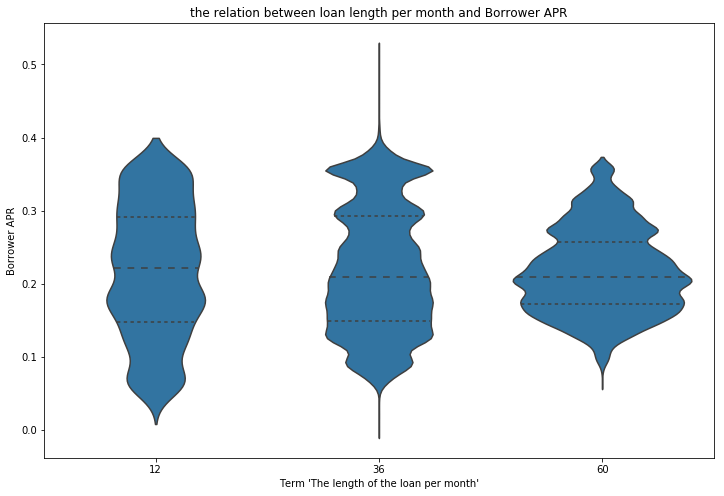

In [112]:
term=["12","36","60"]
tclasses=pd.api.types.CategoricalDtype(ordered=True,categories=term)
df["Term"]=df["Term"].astype(tclasses)

plt.figure(figsize = [12, 8])
color=sb.color_palette()[0]
sb.violinplot(data=df,x="Term",y="BorrowerAPR",color=color,inner="quartile")
# labels and title
plt.xlabel("Term 'The length of the loan per month'");
plt.ylabel("Borrower APR");
plt.title("the relation between loan length per month and Borrower APR");

>36 months loan has a wider range of Borrower APR but we need to focus more so we will apply the FacetGrid

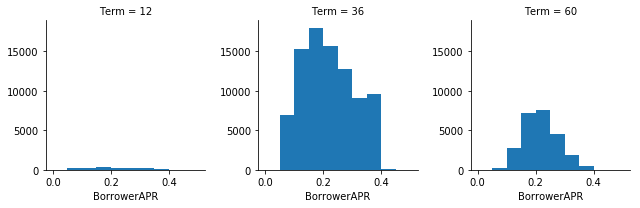

In [115]:
bin_edge=np.arange(0,0.5+0.05,.05)
g=sb.FacetGrid(data=df,col="Term");
g.map(plt.hist,"BorrowerAPR",bins=bin_edge);

>Now it's more clear that 36 months has the wider borrower APR and also has more frequency comparing with 12, 60 months

>**The relation between Loan Original Amount and Listing Category**

In [116]:
my_order = df.groupby(by=["ListingCategory (numeric)"])["LoanOriginalAmount"].median().sort_values().iloc[::-1].index
my_order

Index(['Debt Consolidation', 'Baby&Adoption', 'Wedding Loans', 'Business',
       'Boat', 'Engagement Ring', 'Large Purchases', 'Home Improvement', 'RV',
       'Green Loans', 'Taxes', 'Not Available', 'Medical/Dental', 'Motorcycle',
       'Vacation', 'Household Expenses', 'Other', 'Cosmetic Procedure', 'Auto',
       'Personal Loan', 'Student Use'],
      dtype='object', name='ListingCategory (numeric)')

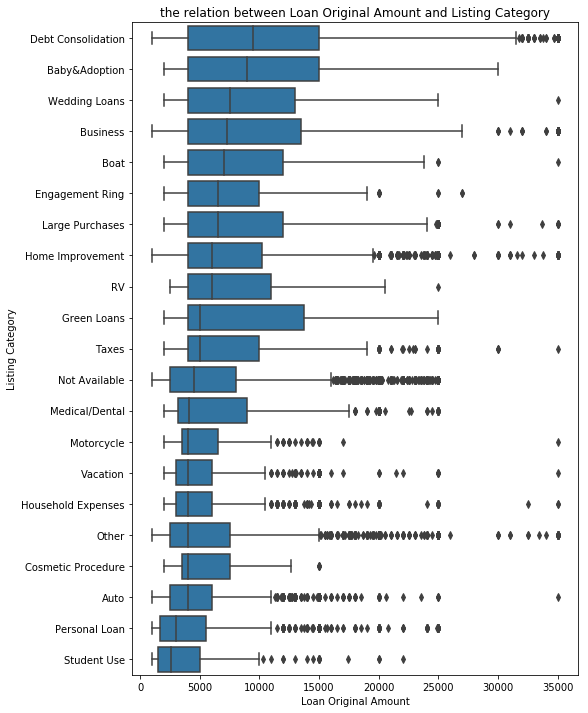

In [117]:
plt.figure(figsize=[8,12])
color=sb.color_palette()[0]

my_order = df.groupby(by=["ListingCategory (numeric)"])["LoanOriginalAmount"].median().sort_values().iloc[::-1].index

sb.boxplot(data=df,y="ListingCategory (numeric)",x="LoanOriginalAmount",color=color,order=my_order);
plt.xlabel("Loan Original Amount");
plt.ylabel("Listing Category");
plt.title("the relation between Loan Original Amount and Listing Category");

>We can see that (Debt consolidation) has highest median and (student use) has lowest median

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When Borrower APR increase the lender yield increase also.<br>
> Borrower APR has strongly -ve relationship with prosper score.<br>
> 36 months loan term has the heighst frequency and wider Borrower APR range.<br>
> People prefer to take loan with 36 months term and it is not depend on the income range.<br>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Peoples take loan for Debt consolidation more than any category.<br>
> Students take the lowest loan original amounts.<br>
> People with high monthly rate take higher loans.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

>**The relation between Income Range & Loan Original Amount & Term**

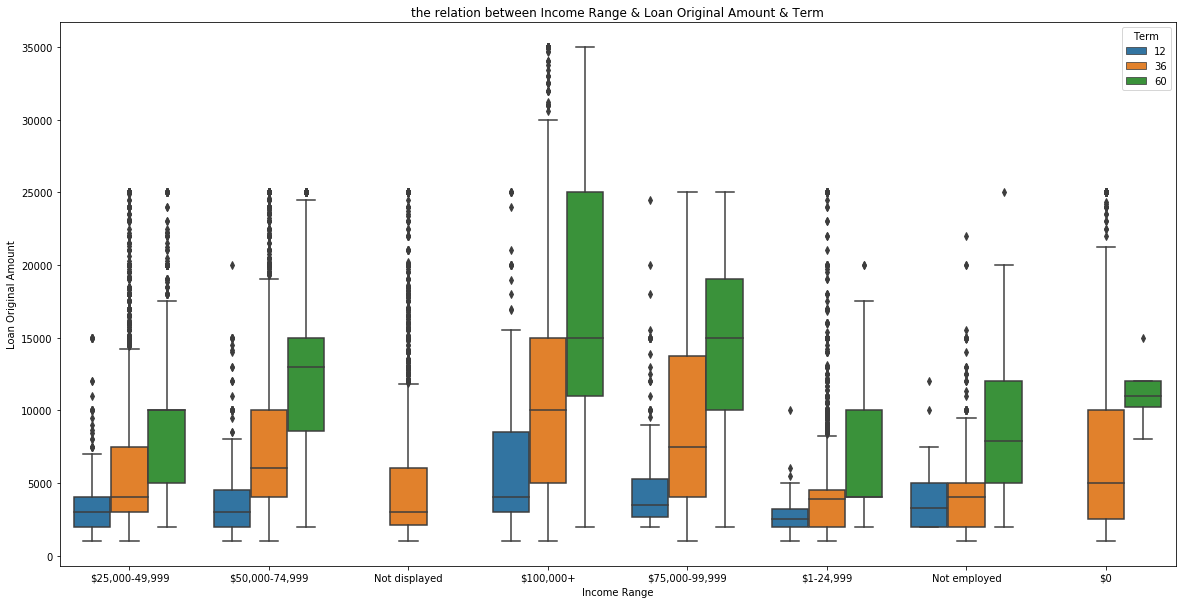

In [118]:
plt.figure(figsize=[20,10])
sb.boxplot(data=df,x="IncomeRange",y="LoanOriginalAmount",hue="Term");
plt.xlabel("Income Range");
plt.ylabel("Loan Original Amount");
plt.title("the relation between Income Range & Loan Original Amount & Term");

>It is very interesting to know that in each income range when the loan original amount passes the median of 60, months term increase more than 12 and 36 months term median

>**The relation between Listing Category & Loan Original Amount & Term**

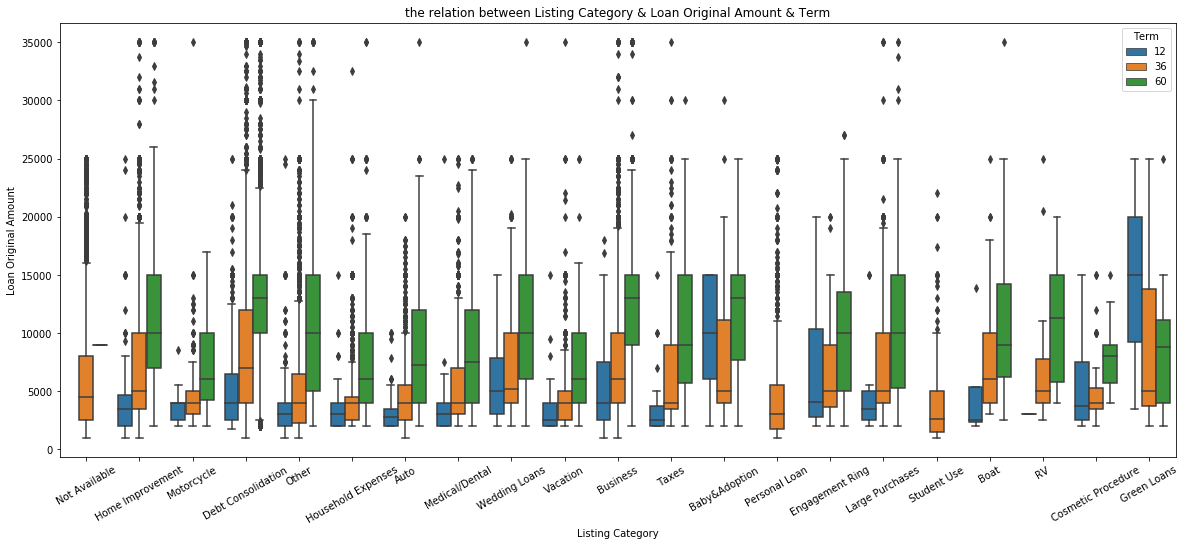

In [119]:
plt.figure(figsize=[20,8])
sb.boxplot(data=df,x="ListingCategory (numeric)",y="LoanOriginalAmount",hue="Term");
plt.xlabel("Listing Category");
plt.ylabel("Loan Original Amount");
plt.title("the relation between Listing Category & Loan Original Amount & Term");
plt.xticks(rotation =30);

> It is interesting to note that the median of 12 months term of Green loans category is higher than other two terms.<br>
> The range of 12 months term in cosmetic procedure is larger than the other two terms.<br>
> Personal loan and student use loan are mainly 36 months terms loan only

>**The relation between Loan Status & Borrower APR & Employment Status**

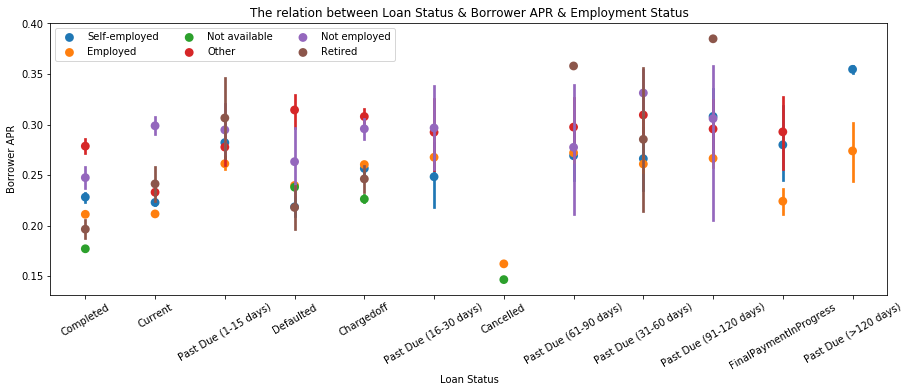

In [120]:
plt.figure(figsize=[15,5])
sb.pointplot(data=df,x="LoanStatus",y="BorrowerAPR",hue="EmploymentStatus",linestyles="");
plt.xticks(rotation =30);
plt.legend(ncol=3);

plt.ylabel("Borrower APR")
plt.xlabel("Loan Status");
plt.title("The relation between Loan Status & Borrower APR & Employment Status");

> From this graph we can see that when the loan status is past due(91-120 days) the retired employes had the highest borrower APR<br>

> People with full time and part time jobs had a lower borrower APR in all loan status

>**The relation between Borrower APR & Lender Yield & ProsperScore**

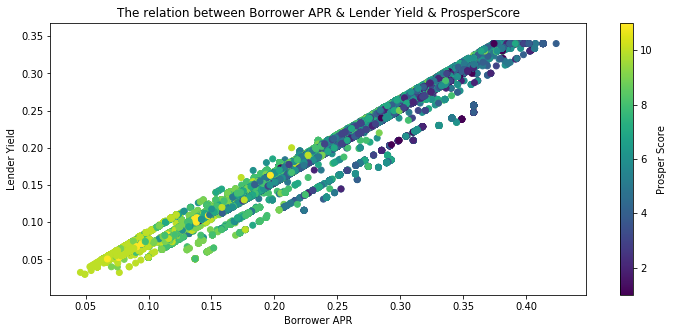

In [121]:
plt.figure(figsize=[12,5])
plt.scatter(data=df,x="BorrowerAPR",y = "LenderYield",c="ProsperScore")
plt.xlabel("Borrower APR")
plt.ylabel("Lender Yield");
plt.title("The relation between Borrower APR & Lender Yield & ProsperScore");
plt.colorbar(label="Prosper Score");

> This graph shows that the loans with higher Borrower APR and Lender yield had a lower prosper score.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationships show that the loans with higher borrower APR and Lender yield tends to had a lower prosper sore<br>
> People with full time and part time jobs had a lower borrower APR in all loan status

### Were there any interesting or surprising interactions between features?

> In each income range when the loan original amount increased the median of 60 months term increase more than 12 and 36 months term medians.<br>
> It is interesting to see that because the median of 12 months term of Green loans category is higher than other two terms.<br>
> The range of 12 months term in cosmetic procedure is larger than the other two terms.<br>
> Personal loan and student use loan takes 36 months terms.

In [ ]:
!jupyter nbconvert Prosper_Loan_Data.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Prosper_Loan_Data.ipynb to slides
[NbConvertApp] Writing 1297511 bytes to Prosper_Loan_Data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Prosper_Loan_Data.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not fo